In [49]:
import matplotlib.pyplot as plt
from numpy import asarray
from PIL import Image
import sys
import cv2
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

In [75]:
img = cv2.imread('Mathias2.jpg')
hc = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
faces = hc.detectMultiScale(img)

In [76]:
def coupage (Bbox, image, nom):
        im=plt.imread(image)
        x1=(Bbox[0][1])
        y1=(Bbox[0][0])
        width=(Bbox[0][3])
        height=(Bbox[0][2])
        x2, y2 = x1 + width, y1 + height
        new_image = im[y1:y2, x1:x2]
        plt.imshow(new_image)
        plt.savefig(nom)

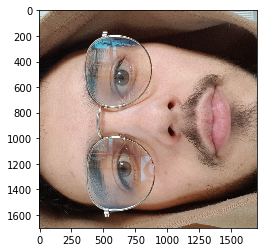

In [77]:
coupage(faces, 'Mathias2.jpg','Mathias2_crop.jpg')

In [78]:
img = cv2.imread('Mathias1.jpg')
hc = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
faces = hc.detectMultiScale(img)

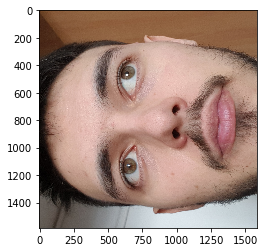

In [79]:
coupage(faces, 'Mathias1.jpg','Mathias1_crop.jpg')

In [80]:

def get_model_scores(faces):
    samples = asarray(faces, 'float32')
    samples = preprocess_input(samples, version=2)
    model = VGGFace(model='resnet50',
      include_top=False,
      pooling='avg')
    
    return model.predict(samples)


In [81]:
image1 = plt.imread('Mathias1_crop.jpg')
image2 = plt.imread('Mathias2_crop.jpg')
faces = [image1, image2]
model_scores = get_model_scores(faces)

In [82]:
if cosine(model_scores[0], model_scores[1]) <= 0.4:
    print(True)
else:
    print(False)

True
